# Support Vector Machine (SVM)

In [1]:
import numpy as np
from sklearn.svm import SVC
import mglearn
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions # Decision Boundaries Visualization

warnings.filterwarnings(action='ignore')

## training data set

In [2]:
x_data, t_data = mglearn.datasets.make_forge()
print(x_data) # feature: 2개
print(t_data) # Binary Classification

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


## Data Visualization
* t_data가 0인 경우, 빨간색 점으로 표현
* t_data가 1인 경우, 파란색 점으로 표현

[[11.0329545  -0.16816717]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 9.67284681 -0.20283165]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]]
[[ 9.96346605  4.59676542]
 [11.54155807  5.21116083]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 9.32298256  5.09840649]
 [ 9.15072323  5.49832246]]


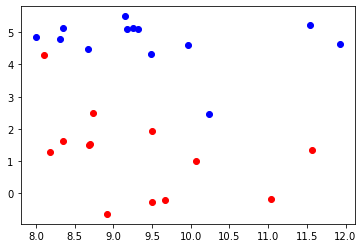

In [3]:
# 빨간점에 대한 좌표값
x_data_red = x_data[t_data==0] 
print(x_data_red)

# 파란점에 대한 좌표값
x_data_blue = x_data[t_data==1]
print(x_data_blue)

# 2차원 평면에서의 시각화 (첫번째 컬럼: x, 두번째 컬럼: y)
plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')

plt.show()

## SVM Classifier 모델

[[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


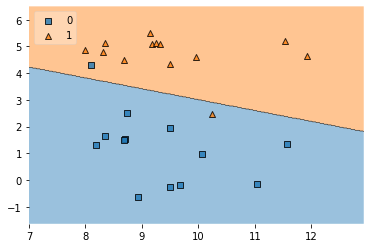

In [4]:
# model
model = SVC(kernel='linear', C=1) 

# learning
model.fit(x_data, t_data)

# support vector
print(model.support_vectors_)

# decision boundaries
plot_decision_regions(X=x_data, y=t_data, clf=model, legend=2)
plt.show()

## BMI 예제

### 샘플 데이터 30개

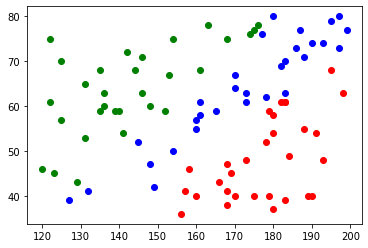

[[158.  46.]
 [182.  61.]
 [127.  39.]
 [183.  63.]
 [149.  42.]
 [177.  76.]
 [180.  80.]
 [152.  59.]
 [129.  43.]
 [174.  76.]]


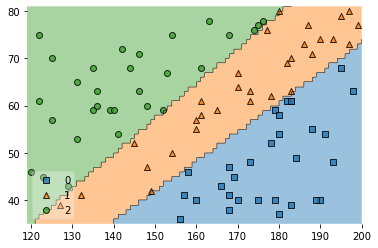

In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings(action='ignore')

df = pd.read_csv('data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

num_of_data = 30

# label: 0 => red
x_data_red = x_data[t_data==0][:num_of_data]
t_data_red = t_data[t_data==0][:num_of_data]

# label: 1 => blue
x_data_blue = x_data[t_data==1][:num_of_data]
t_data_blue = t_data[t_data==1][:num_of_data]

# label: 2 => green
x_data_green = x_data[t_data==2][:num_of_data]
t_data_green = t_data[t_data==2][:num_of_data]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0], x_data_green[:,1], color='g')

plt.show()

# sample
x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green),axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green),axis=0)

# model
model = SVC(kernel='linear') 

# learning
model.fit(x_data_sample, t_data_sample)

# support vector
print(model.support_vectors_)

# decision boundaries
plot_decision_regions(X=x_data_sample, y=t_data_sample, clf=model, legend=3)
plt.show()

### 모든 데이터

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data, t_data, test_size=0.2, random_state=0)

# model
model = SVC(kernel='linear') 

# learning
model.fit(x_data_train, t_data_train)

# evaluation
result = classification_report(t_data_test, model.predict(x_data_test))
print(result)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1276
           1       0.97      0.97      0.97      1158
           2       0.99      0.99      0.99      1566

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



## Hyper-parameter를 조절하여 SVM 모델을 최적화해보자.

### GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV

# data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data, t_data, test_size=0.2, random_state=0)

# hyper-parameter
param_grid = [
    # 8번
    {'kernel': ['linear'],
     'C': [10,30,100,300,1000,3000,10000,30000]},
    # C(8번)⨉gamma(6번) = 48번
    {'kernel': ['rbf'],
     'C': [1,3,10,30,100,300,1000,3000],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

# model (옵션 X)
model = SVC() 

# 최적화
# 5⨉(8번 + 48번): Fitting 5 folds for each of 56 candidates, totalling 280 fits
grid_search = GridSearchCV(model, param_grid, 
                           cv=5, scoring='accuracy', verbose=2) 

# learning
grid_search.fit(x_data_train, t_data_train)

# 최적의 파라미터 출력
result = grid_search.best_params_
score = grid_search.best_score_
print(result)
print(score)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ................................C=10, kernel=linear; total time=   1.3s
[CV] END ................................C=10, kernel=linear; total time=   1.1s
[CV] END ................................C=10, kernel=linear; total time=   0.8s
[CV] END ................................C=10, kernel=linear; total time=   1.0s
[CV] END ................................C=10, kernel=linear; total time=   1.1s
[CV] END ................................C=30, kernel=linear; total time=   2.3s
[CV] END ................................C=30, kernel=linear; total time=   1.9s
[CV] END ................................C=30, kernel=linear; total time=   2.0s
[CV] END ................................C=30, kernel=linear; total time=   1.8s
[CV] END ................................C=30, kernel=linear; total time=   1.8s
[CV] END ...............................C=100, kernel=linear; total time=   6.2s
[CV] END ...............................C=100, 

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.9s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.9s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.9s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.9s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.9s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ...................

[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.6s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.6s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   7.0s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   7.0s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.7s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   5.3s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   5.3s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   5.2s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   5.3s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   5.3s
[CV] END ...................

### RandomizeSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import expon, reciprocal
from sklearn.model_selection import RandomizedSearchCV

# data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data, t_data, test_size=0.2, random_state=0)

# hyper-parameter
param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20,200000),
    'gamma': expon(scale=1.0)
}

# model (옵션 X)
model = SVC() 

# 최적화
random_search = RandomizedSearchCV(model, param_dist, 
                           cv=5, n_iter=50,
                           scoring='accuracy', verbose=2) 

# learning
random_search.fit(x_data_train, t_data_train)

# 최적의 파라미터 출력
result = random_search.best_params_
score = random_search.best_score_
print(result)
print(score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=24.41264341648941, gamma=0.6253579023931131, kernel=rbf; total time=   8.5s
[CV] END C=24.41264341648941, gamma=0.6253579023931131, kernel=rbf; total time=   8.9s
[CV] END C=24.41264341648941, gamma=0.6253579023931131, kernel=rbf; total time=   8.2s
[CV] END C=24.41264341648941, gamma=0.6253579023931131, kernel=rbf; total time=   8.4s
[CV] END C=24.41264341648941, gamma=0.6253579023931131, kernel=rbf; total time=   8.2s
[CV] END C=73.52300062277092, gamma=0.5336126845018652, kernel=linear; total time=   3.1s
[CV] END C=73.52300062277092, gamma=0.5336126845018652, kernel=linear; total time=   4.0s
[CV] END C=73.52300062277092, gamma=0.5336126845018652, kernel=linear; total time=   4.2s
[CV] END C=73.52300062277092, gamma=0.5336126845018652, kernel=linear; total time=   3.7s
[CV] END C=73.52300062277092, gamma=0.5336126845018652, kernel=linear; total time=   3.4s
[CV] END C=13394.243374829868, gamma=0.54801306055248

[CV] END C=116373.37075164529, gamma=1.217624144015739, kernel=linear; total time=105.5min
